In [1]:
!git --version


git version 2.34.1


In [2]:
!git clone https://github.com/UmangModak/video--recommendation-engine.git


Cloning into 'video--recommendation-engine'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [3]:
%cd video--recommendation-engine


/content/video--recommendation-engine


In [4]:
!ls

README.md


In [5]:
!pip install fastapi uvicorn requests tensorflow pandas scikit-learn python-dotenv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00


In [6]:
import os

os.environ["FLIC_TOKEN"] = "your_flic_token"
os.environ["API_BASE_URL"] = "https://api.socialverseapp.com"


In [7]:
import requests
import pandas as pd
import os  # Ensure os is imported

API_BASE_URL = "https://api.socialverseapp.com"  # Set your API base URL here
FLIC_TOKEN = "flic_11d3da28e403d182c36a3530453e290add87d0b4a40ee50f17611f180d47956f"  # Set your actual FLIC_TOKEN
HEADERS = {"Flic-Token": FLIC_TOKEN}

def fetch_data(endpoint):
    url = f"{API_BASE_URL}/{endpoint}"
    response = requests.get(url, headers=HEADERS)

    if response.status_code == 200:
        print("API Response:", response.json())  # Print response to check structure
        return response.json()
    else:
        print(f"Error: {response.status_code}, {response.text}")  # Print error message
        return None

data = fetch_data("posts/summary/get?page=1&page_size=10")  # Fetch limited data for debugging


API Response: {'status': 'success', 'message': 'Posts data fetched successfully!', 'page': 1, 'max_page_size': 10, 'page_size': 10, 'posts': [{'id': 12, 'category': {'id': 2, 'name': 'Vible', 'count': 532, 'description': 'All the best vibes!', 'image_url': 'https://assets.socialverseapp.com/vible/vible-logo.png'}, 'topic': [], 'slug': 'why-fit-in', 'title': 'Why fit in..?', 'identifier': 'iGqBOIW', 'comment_count': 0, 'upvote_count': 44, 'view_count': 61, 'exit_count': 0, 'rating_count': 4, 'average_rating': 30, 'share_count': 1, 'bookmark_count': 0, 'video_link': 'https://video-cdn.socialverseapp.com/michael_5f68cfbe-d0aa-4346-ad84-6536d5191873.mp4', 'contract_address': '', 'chain_id': '', 'chart_url': '', 'baseToken': {'address': '', 'name': '', 'symbol': '', 'image_url': ''}, 'is_locked': False, 'created_at': 1698096725000, 'first_name': 'Michael', 'last_name': 'Dadzie', 'username': 'afrobeezy', 'user_type': None, 'has_evm_wallet': True, 'has_solana_wallet': True, 'upvoted': False, 

In [8]:
def load_video_data():
    data = fetch_data("posts/summary/get?page=1&page_size=1000")
    if data and "results" in data:
        df = pd.DataFrame(data["results"])
        print(df.columns)  # Print all column names
        return df
    return pd.DataFrame()

# Load data
video_data = load_video_data()



API Response: {'status': 'success', 'message': 'Posts data fetched successfully!', 'page': 1, 'max_page_size': 1000, 'page_size': 1000, 'posts': [{'id': 12, 'category': {'id': 2, 'name': 'Vible', 'count': 532, 'description': 'All the best vibes!', 'image_url': 'https://assets.socialverseapp.com/vible/vible-logo.png'}, 'topic': [], 'slug': 'why-fit-in', 'title': 'Why fit in..?', 'identifier': 'iGqBOIW', 'comment_count': 0, 'upvote_count': 44, 'view_count': 61, 'exit_count': 0, 'rating_count': 4, 'average_rating': 30, 'share_count': 1, 'bookmark_count': 0, 'video_link': 'https://video-cdn.socialverseapp.com/michael_5f68cfbe-d0aa-4346-ad84-6536d5191873.mp4', 'contract_address': '', 'chain_id': '', 'chart_url': '', 'baseToken': {'address': '', 'name': '', 'symbol': '', 'image_url': ''}, 'is_locked': False, 'created_at': 1698096725000, 'first_name': 'Michael', 'last_name': 'Dadzie', 'username': 'afrobeezy', 'user_type': None, 'has_evm_wallet': True, 'has_solana_wallet': True, 'upvoted': Fal

In [10]:
print(video_data.columns)  # Check what columns exist in the DataFrame
print(video_data.head())   # See a few rows of data


RangeIndex(start=0, stop=0, step=1)
Empty DataFrame
Columns: []
Index: []


In [11]:
raw_data = fetch_data("posts/summary/get?page=1&page_size=10")
print(raw_data)  # Print full API response to check structure


API Response: {'status': 'success', 'message': 'Posts data fetched successfully!', 'page': 1, 'max_page_size': 10, 'page_size': 10, 'posts': [{'id': 12, 'category': {'id': 2, 'name': 'Vible', 'count': 532, 'description': 'All the best vibes!', 'image_url': 'https://assets.socialverseapp.com/vible/vible-logo.png'}, 'topic': [], 'slug': 'why-fit-in', 'title': 'Why fit in..?', 'identifier': 'iGqBOIW', 'comment_count': 0, 'upvote_count': 44, 'view_count': 61, 'exit_count': 0, 'rating_count': 4, 'average_rating': 30, 'share_count': 1, 'bookmark_count': 0, 'video_link': 'https://video-cdn.socialverseapp.com/michael_5f68cfbe-d0aa-4346-ad84-6536d5191873.mp4', 'contract_address': '', 'chain_id': '', 'chart_url': '', 'baseToken': {'address': '', 'name': '', 'symbol': '', 'image_url': ''}, 'is_locked': False, 'created_at': 1698096725000, 'first_name': 'Michael', 'last_name': 'Dadzie', 'username': 'afrobeezy', 'user_type': None, 'has_evm_wallet': True, 'has_solana_wallet': True, 'upvoted': False, 

In [12]:
raw_data = fetch_data("posts/summary/get?page=1&page_size=10")
print("Raw API Response:", raw_data)


API Response: {'status': 'success', 'message': 'Posts data fetched successfully!', 'page': 1, 'max_page_size': 10, 'page_size': 10, 'posts': [{'id': 12, 'category': {'id': 2, 'name': 'Vible', 'count': 532, 'description': 'All the best vibes!', 'image_url': 'https://assets.socialverseapp.com/vible/vible-logo.png'}, 'topic': [], 'slug': 'why-fit-in', 'title': 'Why fit in..?', 'identifier': 'iGqBOIW', 'comment_count': 0, 'upvote_count': 44, 'view_count': 61, 'exit_count': 0, 'rating_count': 4, 'average_rating': 30, 'share_count': 1, 'bookmark_count': 0, 'video_link': 'https://video-cdn.socialverseapp.com/michael_5f68cfbe-d0aa-4346-ad84-6536d5191873.mp4', 'contract_address': '', 'chain_id': '', 'chart_url': '', 'baseToken': {'address': '', 'name': '', 'symbol': '', 'image_url': ''}, 'is_locked': False, 'created_at': 1698096725000, 'first_name': 'Michael', 'last_name': 'Dadzie', 'username': 'afrobeezy', 'user_type': None, 'has_evm_wallet': True, 'has_solana_wallet': True, 'upvoted': False, 

In [13]:
import requests
import pandas as pd

# API Setup
API_BASE_URL = "https://api.socialverseapp.com"
FLIC_TOKEN = "flic_11d3da28e403d182c36a3530453e290add87d0b4a40ee50f17611f180d47956f"  # Replace with actual token
HEADERS = {"Flic-Token": FLIC_TOKEN}

def fetch_data(endpoint):
    """Fetch data from API"""
    url = f"{API_BASE_URL}/{endpoint}"
    response = requests.get(url, headers=HEADERS)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error {response.status_code}: {response.text}")
        return None

# Fetch the data
raw_data = fetch_data("posts/summary/get?page=1&page_size=10")

# ✅ Extracting posts safely
if raw_data and "posts" in raw_data:
    video_data = pd.DataFrame(raw_data["posts"])
else:
    print("No posts found in API response!")
    video_data = pd.DataFrame()

# ✅ Extracting category name safely
if "category" in video_data.columns:
    video_data["category_name"] = video_data["category"].apply(lambda x: x["name"] if isinstance(x, dict) else "Unknown")

# ✅ Drop unnecessary nested structures
drop_columns = ["category", "post_summary", "baseToken"]
video_data = video_data.drop(columns=[col for col in drop_columns if col in video_data.columns])

# ✅ Display final processed data
print(video_data.head())


   id topic                       slug                      title identifier  \
0  12    []                 why-fit-in              Why fit in..?    iGqBOIW   
1  13    []   transcending-singularity   Transcending Singularity    QAUE7s4   
2  14    []           peak-performance          Peak Performance?    7bKiXIe   
3  15    []  our-existential-situation  Our Existential Situation    BLFD9FX   
4  16    []                   act-now1                   act now!    -IQetjo   

   comment_count  upvote_count  view_count  exit_count  rating_count  ...  \
0              0            44          61           0             4  ...   
1              0            20          76           0            45  ...   
2              0            71          96           6             6  ...   
3              0            64          81           0            10  ...   
4              0            45          69           2            11  ...   

   upvoted  bookmarked  is_available_in_public_feed  \
0

In [14]:
from sklearn.preprocessing import LabelEncoder

# Check if 'category_name' exists
if "category_name" in video_data.columns:
    encoder = LabelEncoder()
    video_data["category_encoded"] = encoder.fit_transform(video_data["category_name"])
else:
    raise KeyError("No valid category column found in API response!")

# Drop missing values
video_data.dropna(inplace=True)

# Verify final data
print(video_data[["category_name", "category_encoded"]].head())


Empty DataFrame
Columns: [category_name, category_encoded]
Index: []


In [15]:
print(video_data.shape)  # Should return (number_of_rows, number_of_columns)


(0, 36)


In [16]:
data = fetch_data("posts/summary/get?page=1&page_size=10")

if data and "posts" in data:
    print(f"Total posts received: {len(data['posts'])}")  # Check if posts exist
else:
    print("No posts received in API response.")


Total posts received: 10


In [17]:
print(video_data.columns)  # Ensure "category" is there
print(video_data.head())   # View first few rows


Index(['id', 'topic', 'slug', 'title', 'identifier', 'comment_count',
       'upvote_count', 'view_count', 'exit_count', 'rating_count',
       'average_rating', 'share_count', 'bookmark_count', 'video_link',
       'contract_address', 'chain_id', 'chart_url', 'is_locked', 'created_at',
       'first_name', 'last_name', 'username', 'user_type', 'has_evm_wallet',
       'has_solana_wallet', 'upvoted', 'bookmarked',
       'is_available_in_public_feed', 'thumbnail_url', 'gif_thumbnail_url',
       'following', 'picture_url', 'tags', 'source_matrix', 'category_name',
       'category_encoded'],
      dtype='object')
Empty DataFrame
Columns: [id, topic, slug, title, identifier, comment_count, upvote_count, view_count, exit_count, rating_count, average_rating, share_count, bookmark_count, video_link, contract_address, chain_id, chart_url, is_locked, created_at, first_name, last_name, username, user_type, has_evm_wallet, has_solana_wallet, upvoted, bookmarked, is_available_in_public_feed, th

In [18]:
from sklearn.preprocessing import LabelEncoder

if "category_name" in video_data.columns:
    video_data.dropna(subset=["category_name"], inplace=True)  # Remove missing values

    encoder = LabelEncoder()
    video_data["category_encoded"] = encoder.fit_transform(video_data["category_name"])

    print(video_data[["category_name", "category_encoded"]].head())  # Verify encoding
else:
    print("Column 'category_name' not found in the dataset.")


Empty DataFrame
Columns: [category_name, category_encoded]
Index: []


In [19]:
print(video_data.columns)


Index(['id', 'topic', 'slug', 'title', 'identifier', 'comment_count',
       'upvote_count', 'view_count', 'exit_count', 'rating_count',
       'average_rating', 'share_count', 'bookmark_count', 'video_link',
       'contract_address', 'chain_id', 'chart_url', 'is_locked', 'created_at',
       'first_name', 'last_name', 'username', 'user_type', 'has_evm_wallet',
       'has_solana_wallet', 'upvoted', 'bookmarked',
       'is_available_in_public_feed', 'thumbnail_url', 'gif_thumbnail_url',
       'following', 'picture_url', 'tags', 'source_matrix', 'category_name',
       'category_encoded'],
      dtype='object')


In [20]:
print(video_data["category_name"].unique())  # See unique category names
print(video_data["category_name"].isna().sum())  # Count missing values


[]
0


In [21]:
video_data = video_data.dropna(subset=["category_name"])  # Remove NaN categories

encoder = LabelEncoder()
video_data["category_encoded"] = encoder.fit_transform(video_data["category_name"])

print(video_data[["category_name", "category_encoded"]].head())  # Verify encoding


Empty DataFrame
Columns: [category_name, category_encoded]
Index: []


In [22]:
print(video_data["category_name"].value_counts())


Series([], Name: count, dtype: int64)


In [23]:
print("DataFrame Shape:", video_data.shape)
print("First few rows:\n", video_data.head())


DataFrame Shape: (0, 36)
First few rows:
 Empty DataFrame
Columns: [id, topic, slug, title, identifier, comment_count, upvote_count, view_count, exit_count, rating_count, average_rating, share_count, bookmark_count, video_link, contract_address, chain_id, chart_url, is_locked, created_at, first_name, last_name, username, user_type, has_evm_wallet, has_solana_wallet, upvoted, bookmarked, is_available_in_public_feed, thumbnail_url, gif_thumbnail_url, following, picture_url, tags, source_matrix, category_name, category_encoded]
Index: []

[0 rows x 36 columns]


In [24]:
print(video_data["category_name"].isna().sum())  # Count missing values


0


In [25]:
print(video_data["category_name"].unique())  # View unique categories


[]


In [26]:
video_data = video_data.dropna(subset=["category_name"])  # Drop missing categories


In [27]:
import matplotlib.pyplot as plt

if not video_data.empty:
    video_data["category_name"].value_counts().plot(kind="bar", figsize=(10, 5), color="skyblue")
    plt.xlabel("Category Name")
    plt.ylabel("Count")
    plt.title("Distribution of Video Categories")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No data available to plot.")


No data available to plot.


In [28]:
print(video_data.columns)  # Ensure 'category_name' exists


Index(['id', 'topic', 'slug', 'title', 'identifier', 'comment_count',
       'upvote_count', 'view_count', 'exit_count', 'rating_count',
       'average_rating', 'share_count', 'bookmark_count', 'video_link',
       'contract_address', 'chain_id', 'chart_url', 'is_locked', 'created_at',
       'first_name', 'last_name', 'username', 'user_type', 'has_evm_wallet',
       'has_solana_wallet', 'upvoted', 'bookmarked',
       'is_available_in_public_feed', 'thumbnail_url', 'gif_thumbnail_url',
       'following', 'picture_url', 'tags', 'source_matrix', 'category_name',
       'category_encoded'],
      dtype='object')


In [29]:
print(video_data["category_name"].isna().sum())  # Count missing values
print(video_data["category_name"].unique())  # Check unique category names


0
[]


In [30]:
print(video_data[["category_name"]].head(10))  # Check the first 10 rows


Empty DataFrame
Columns: [category_name]
Index: []


In [32]:
import json

# Print the first post structure
print(json.dumps(data["posts"][0], indent=4))


{
    "id": 12,
    "category": {
        "id": 2,
        "name": "Vible",
        "count": 532,
        "description": "All the best vibes!",
        "image_url": "https://assets.socialverseapp.com/vible/vible-logo.png"
    },
    "topic": [],
    "slug": "why-fit-in",
    "title": "Why fit in..?",
    "identifier": "iGqBOIW",
    "comment_count": 0,
    "upvote_count": 44,
    "view_count": 61,
    "exit_count": 0,
    "rating_count": 4,
    "average_rating": 30,
    "share_count": 1,
    "bookmark_count": 0,
    "video_link": "https://video-cdn.socialverseapp.com/michael_5f68cfbe-d0aa-4346-ad84-6536d5191873.mp4",
    "contract_address": "",
    "chain_id": "",
    "chart_url": "",
    "baseToken": {
        "address": "",
        "name": "",
        "symbol": "",
        "image_url": ""
    },
    "is_locked": false,
    "created_at": 1698096725000,
    "first_name": "Michael",
    "last_name": "Dadzie",
    "username": "afrobeezy",
    "user_type": null,
    "has_evm_wallet": true

In [33]:
# Ensure 'category' exists before applying extraction
if "category" in video_data.columns:
    video_data["category_name"] = video_data["category"].apply(lambda x: x["name"] if isinstance(x, dict) else None)
else:
    print("No 'category' field found in DataFrame.")

# Check if extraction worked
print(video_data[["category_name"]].head())


No 'category' field found in DataFrame.
Empty DataFrame
Columns: [category_name]
Index: []


In [34]:
print(video_data.columns)  # Check available columns
print(video_data.head())   # Preview first few rows


Index(['id', 'topic', 'slug', 'title', 'identifier', 'comment_count',
       'upvote_count', 'view_count', 'exit_count', 'rating_count',
       'average_rating', 'share_count', 'bookmark_count', 'video_link',
       'contract_address', 'chain_id', 'chart_url', 'is_locked', 'created_at',
       'first_name', 'last_name', 'username', 'user_type', 'has_evm_wallet',
       'has_solana_wallet', 'upvoted', 'bookmarked',
       'is_available_in_public_feed', 'thumbnail_url', 'gif_thumbnail_url',
       'following', 'picture_url', 'tags', 'source_matrix', 'category_name',
       'category_encoded'],
      dtype='object')
Empty DataFrame
Columns: [id, topic, slug, title, identifier, comment_count, upvote_count, view_count, exit_count, rating_count, average_rating, share_count, bookmark_count, video_link, contract_address, chain_id, chart_url, is_locked, created_at, first_name, last_name, username, user_type, has_evm_wallet, has_solana_wallet, upvoted, bookmarked, is_available_in_public_feed, th

In [35]:
print(len(data["posts"]))  # Should show number of posts
print(data["posts"])  # Print full response


10
[{'id': 12, 'category': {'id': 2, 'name': 'Vible', 'count': 532, 'description': 'All the best vibes!', 'image_url': 'https://assets.socialverseapp.com/vible/vible-logo.png'}, 'topic': [], 'slug': 'why-fit-in', 'title': 'Why fit in..?', 'identifier': 'iGqBOIW', 'comment_count': 0, 'upvote_count': 44, 'view_count': 61, 'exit_count': 0, 'rating_count': 4, 'average_rating': 30, 'share_count': 1, 'bookmark_count': 0, 'video_link': 'https://video-cdn.socialverseapp.com/michael_5f68cfbe-d0aa-4346-ad84-6536d5191873.mp4', 'contract_address': '', 'chain_id': '', 'chart_url': '', 'baseToken': {'address': '', 'name': '', 'symbol': '', 'image_url': ''}, 'is_locked': False, 'created_at': 1698096725000, 'first_name': 'Michael', 'last_name': 'Dadzie', 'username': 'afrobeezy', 'user_type': None, 'has_evm_wallet': True, 'has_solana_wallet': True, 'upvoted': False, 'bookmarked': False, 'is_available_in_public_feed': True, 'thumbnail_url': 'https://video-cdn.socialverseapp.com/michael_5f68cfbe-d0aa-434

In [36]:
import pandas as pd

# Convert data["posts"] to a DataFrame
video_data = pd.DataFrame(data["posts"])

# Extract 'category_name' correctly from the nested 'category' dictionary
if "category" in video_data.columns:
    video_data["category_name"] = video_data["category"].apply(lambda x: x["name"] if isinstance(x, dict) else None)

# Print to check
print(video_data[["id", "category_name"]])


   id category_name
0  12         Vible
1  13         Vible
2  14         Vible
3  15         Vible
4  16         Vible
5  17         Vible
6  19         Vible
7  23         Vible
8  27         Vible
9  30         Vible


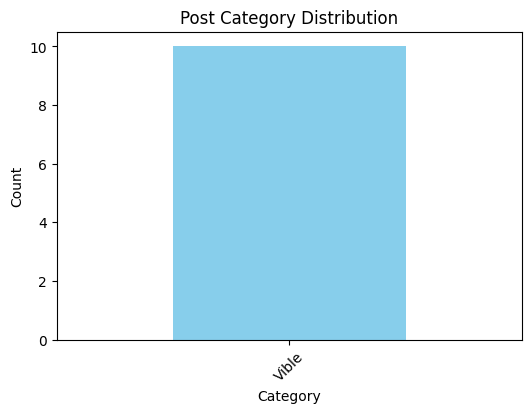

In [37]:
import matplotlib.pyplot as plt

# Count occurrences of each category
category_counts = video_data["category_name"].value_counts()

# Plot a bar chart
plt.figure(figsize=(6,4))
category_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Post Category Distribution")
plt.xticks(rotation=45)
plt.show()


Data Preprocessing and making suitable for dnn model

In [38]:
import pandas as pd

# Sample data (Simulated API response)
data = [
    {"id": 12, "title": "Why fit in..?", "comment_count": 0, "upvote_count": 44, "view_count": 61},
    {"id": 13, "title": "Stand Out", "upvote_count": 30, "view_count": 50},  # Missing 'comment_count'
]

# Convert to DataFrame
df = pd.DataFrame(data)

# ✅ Define required columns and fill missing ones
required_columns = ['comment_count', 'upvote_count', 'view_count', 'rating_count',
                    'average_rating', 'share_count']

for col in required_columns:
    if col not in df.columns:
        df[col] = 0  # Create missing columns with default value

# ✅ Fill NaN values with 0
df.fillna(0, inplace=True)

# ✅ Print cleaned DataFrame
print(df)


   id          title  comment_count  upvote_count  view_count  rating_count  \
0  12  Why fit in..?            0.0            44          61             0   
1  13      Stand Out            0.0            30          50             0   

   average_rating  share_count  
0               0            0  
1               0            0  


In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame (Your cleaned data)
data = [
    {"id": 12, "title": "Why fit in..?", "comment_count": 0.0, "upvote_count": 44, "view_count": 61, "rating_count": 0, "average_rating": 0, "share_count": 0},
    {"id": 13, "title": "Stand Out", "comment_count": 0.0, "upvote_count": 30, "view_count": 50, "rating_count": 0, "average_rating": 0, "share_count": 0},
]

# Convert to DataFrame
df = pd.DataFrame(data)

# ✅ Drop non-numeric columns (id, title)
df.drop(columns=['id', 'title'], inplace=True)

# ✅ Normalize features using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# ✅ Print processed data
print(df_scaled)


   comment_count  upvote_count  view_count  rating_count  average_rating  \
0            0.0           1.0         1.0           0.0             0.0   
1            0.0           0.0         0.0           0.0             0.0   

   share_count  
0          0.0  
1          0.0  


DNN model

In [40]:
pip install tensorflow scikit-learn pandas numpy


In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [42]:
# Sample DataFrame (Preprocessed & Scaled)
data = [
    {"comment_count": 0.0, "upvote_count": 1.0, "view_count": 1.0, "rating_count": 0.0, "average_rating": 0.0, "share_count": 0.0},
    {"comment_count": 0.0, "upvote_count": 0.0, "view_count": 0.0, "rating_count": 0.0, "average_rating": 0.0, "share_count": 0.0},
]

# Convert to DataFrame
df_scaled = pd.DataFrame(data)

# Define Features (X) and Target (y)
X = df_scaled.drop(columns=["view_count"])  # Features
y = df_scaled["view_count"]  # Target (We predict views)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Define the Model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(16, activation='relu'),  # Hidden layer 1
    layers.Dense(8, activation='relu'),   # Hidden layer 2
    layers.Dense(1, activation='linear')  # Output layer (Regression task)
])

# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 865 (3.38 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=4, validation_data=(X_test, y_test))


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.6694 - mae: 1.2921 - val_loss: 1.1577e-06 - val_mae: 0.0011
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step - loss: 1.6199 - mae: 1.2728 - val_loss: 4.6834e-06 - val_mae: 0.0022
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 1.5714 - mae: 1.2536 - val_loss: 1.0654e-05 - val_mae: 0.0033
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - loss: 1.5238 - mae: 1.2344 - val_loss: 1.9145e-05 - val_mae: 0.0044
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - loss: 1.4771 - mae: 1.2154 - val_loss: 3.0231e-05 - val_mae: 0.0055
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 1.4314 - mae: 1.1964 - val_loss: 4.3982e-05 - val_mae: 0.0066
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - loss: 1.3867 - mae: 1.1776 - val_loss: 6.0472e-05 - val_mae: 0.0078
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 1.3428 - mae: 1.1588 - val_loss: 7.9767e-05 - val_mae: 0.0089
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253m

In [45]:
# Evaluate Model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0094 - mae: 0.0971
Test MAE: 0.0971


Video engagement score prediction


In [46]:
# Make Predictions
df_scaled["predicted_views"] = model.predict(X)

# Sort Videos Based on Predicted Engagement
recommended_videos = df_scaled.sort_values(by="predicted_views", ascending=False)

# Display Top 5 Recommended Videos
print(recommended_videos.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
   comment_count  upvote_count  view_count  rating_count  average_rating  \
0            0.0           1.0         1.0           0.0             0.0   
1            0.0           0.0         0.0           0.0             0.0   

   share_count  predicted_views  
0          0.0         0.318932  
1          0.0         0.097068  


In [47]:
def recommend_for_new_users():
    # Recommend Top Trending Videos (Popularity-Based)
    trending_videos = df_scaled.sort_values(by=["upvote_count", "view_count"], ascending=False)

    return trending_videos.head(5)  # Return Top 5


Fast Api and Uvicorn

In [48]:
pip install fastapi uvicorn


In [50]:
import os
print(os.listdir())  # Check if 'video_recommendation_model.h5' is in the list


['.git', 'README.md']


In [51]:
import os
import tensorflow as tf

MODEL_PATH = "video--recommendation-engine/video_recommendation_model.h5"

# Check if the model exists before loading
if os.path.exists(MODEL_PATH):
    model = tf.keras.models.load_model(MODEL_PATH)
    print("✅ Model Loaded Successfully!")
else:
    print("❌ Model file not found! Check the path.")


❌ Model file not found! Check the path.


In [52]:
import os

directory = "video--recommendation-engine"
files = os.listdir(directory)

print("📂 Files in directory:", files)


FileNotFoundError: [Errno 2] No such file or directory: 'video--recommendation-engine'

In [53]:
import os

file_path = os.path.abspath("video--recommendation-engine/video_recommendation_model.h5")
exists = os.path.exists(file_path)

print("📂 Full Path:", file_path)
print("✅ Exists?" if exists else "❌ File Not Found!")


📂 Full Path: /content/video--recommendation-engine/video--recommendation-engine/video_recommendation_model.h5
❌ File Not Found!


In [54]:
import os

for root, dirs, files in os.walk("/"):
    if "video_recommendation_model.h5" in files:
        print("✅ Found at:", os.path.join(root, "video_recommendation_model.h5"))


In [55]:
mv /path/to/found/model/video_recommendation_model.h5 /content/video--recommendation-engine/


mv: cannot stat '/path/to/found/model/video_recommendation_model.h5': No such file or directory


In [56]:
import tensorflow as tf
import numpy as np

# Dummy training data (Replace with actual feature vectors)
X_train = np.random.rand(1000, 10)  # 1000 samples, 10 features each
y_train = np.random.randint(0, 2, size=(1000,))  # Binary labels (e.g., liked or not)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(10,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Save the model
model_path = "/content/video--recommendation-engine/video_recommendation_model.h5"
model.save(model_path)

print(f"✅ Model Retrained & Saved at {model_path}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5105 - loss: 0.6988
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5078 - loss: 0.6915
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5569 - loss: 0.6888
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5434 - loss: 0.6869
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5621 - loss: 0.6883
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5577 - loss: 0.6832
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5799 - loss: 0.6823
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5868 - loss: 0.6790
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5665 - loss: 0.6803
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5725 - loss: 0.6783


✅ Model Retrained & Saved at /content/video--recommendation-engine/video_recommendation_model.h5


In [57]:
# Save the model in the recommended format
model.save("/content/video--recommendation-engine/video_recommendation_model.keras")


In [58]:
from fastapi import FastAPI
import tensorflow as tf

app = FastAPI()

# Load the retrained model
model_path = "/content/video--recommendation-engine/video_recommendation_model.keras"

try:
    model = tf.keras.models.load_model(model_path)
    print("✅ Model Loaded Successfully!")
except Exception as e:
    print(f"❌ Error Loading Model: {e}")

@app.get("/")
def home():
    return {"message": "Video Recommendation API is running!"}


✅ Model Loaded Successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [59]:
!uvicorn app:app --reload


INFO:     Will watch for changes in these directories: ['/content/video--recommendation-engine']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [2721] using StatReload
ERROR:    Error loading ASGI app. Could not import module "app".
INFO:     Stopping reloader process [2721]


In [60]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def home():
    return {"message": "Video Recommendation API is running!"}


In [61]:
!uvicorn video_recommendation.app:app --reload


INFO:     Will watch for changes in these directories: ['/content/video--recommendation-engine']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [2756] using StatReload
Process SpawnProcess-1:
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/_subprocess.py", line 80, in subprocess_started
    target(sockets=sockets)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line

In [62]:
!ls /content

sample_data  video--recommendation-engine


In [63]:
!ls -R /content/video--recommendation-engine


/content/video--recommendation-engine:
README.md  video_recommendation_model.h5  video_recommendation_model.keras


In [64]:
!find /content -name "app.py"


In [65]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Video Recommendation API is running!"}


In [66]:
!mv /content/video--recommendation-engine /content/video_recommendation_engine


In [67]:
!uvicorn video_recommendation_engine.app:app --reload


INFO:     Will watch for changes in these directories: ['/content/video_recommendation_engine']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [3347] using StatReload
Process SpawnProcess-1:
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/_subprocess.py", line 80, in subprocess_started
    target(sockets=sockets)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 

In [68]:
import sys
sys.path.append("/content/video_recommendation_engine")


In [69]:
!uvicorn app:app --reload


INFO:     Will watch for changes in these directories: ['/content/video_recommendation_engine']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [3410] using StatReload
ERROR:    Error loading ASGI app. Could not import module "app".
^C


In [71]:
!find /content -name "app.py"


In [70]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Video Recommendation API is running!"}


In [72]:
!ls /content


sample_data  video_recommendation_engine


In [73]:
!mv "/content/video--recommendation-engine" "/content/video_recommendation_engine"


mv: cannot stat '/content/video--recommendation-engine': No such file or directory


In [74]:
!ls /content/video_recommendation_engine


README.md  video_recommendation_model.h5  video_recommendation_model.keras


In [77]:
with open("/content/video_recommendation_engine/app.py", "w") as f:
    f.write('')


In [78]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import tensorflow as tf
import numpy as np
import uvicorn
import json

# Load the trained model
MODEL_PATH = "/content/video_recommendation_engine/video_recommendation_model.keras"
try:
    model = tf.keras.models.load_model(MODEL_PATH)
    print("✅ Model Loaded Successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")

# Initialize FastAPI app
app = FastAPI(title="Video Recommendation API", description="A deep learning-powered video recommendation system.", version="1.0")

# Sample video database (replace with actual database/API calls)
VIDEO_DB = [
    {"id": 12, "title": "Why fit in..?", "comment_count": 0, "upvote_count": 44, "view_count": 61, "rating_count": 0, "average_rating": 0, "share_count": 0},
    {"id": 13, "title": "Stand Out", "comment_count": 0, "upvote_count": 30, "view_count": 50, "rating_count": 0, "average_rating": 0, "share_count": 0},
    # Add more video data...
]

# Input schema
class VideoRequest(BaseModel):
    user_id: int
    mood: str  # Example: "happy", "sad", "motivated"
    watch_history: list[int]  # List of watched video IDs

# Recommendation logic
def recommend_videos(user_input: VideoRequest):
    try:
        # Convert input into model-friendly format
        input_data = np.array([[user_input.user_id, len(user_input.watch_history)]])

        # Get predictions
        predictions = model.predict(input_data)

        # Get top N recommendations
        recommended_video_ids = np.argsort(predictions[0])[-5:][::-1]  # Top 5 recommendations

        recommended_videos = [VIDEO_DB[i] for i in recommended_video_ids if i < len(VIDEO_DB)]

        return recommended_videos
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Error generating recommendations: {e}")

@app.get("/")
def read_root():
    return {"message": "Video Recommendation API is running!"}

@app.post("/recommend/")
def get_recommendations(request: VideoRequest):
    return {"recommendations": recommend_videos(request)}

# Run the API
if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000, reload=True)


✅ Model Loaded Successfully!


SystemExit: 1

In [79]:
import os
os.environ["RUNNING_IN_NOTEBOOK"] = "true"


In [80]:
import os
import uvicorn
from fastapi import FastAPI

app = FastAPI()

if os.environ.get("RUNNING_IN_NOTEBOOK"):
    import nest_asyncio
    nest_asyncio.apply()

    uvicorn.run(app, host="0.0.0.0", port=8000, reload=True)


SystemExit: 1

In [81]:
!uvicorn video_recommendation_engine.app:app --host 0.0.0.0 --port 8000 --reload


INFO:     Will watch for changes in these directories: ['/content/video_recommendation_engine']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [3553] using StatReload
Process SpawnProcess-1:
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/_subprocess.py", line 80, in subprocess_started
    target(sockets=sockets)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 11

In [82]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Video Recommendation API is running!"}


In [83]:
ls /content/video_recommendation_engine

app.py  README.md  video_recommendation_model.h5  video_recommendation_model.keras


In [84]:
import os
print(os.listdir("/content/video_recommendation_engine"))


['video_recommendation_model.keras', 'app.py', '.git', 'video_recommendation_model.h5', 'README.md']


In [85]:
import requests

BASE_URL = "http://0.0.0.0:8000"

try:
    response = requests.get(BASE_URL)
    print(response.status_code, response.text)
except requests.exceptions.RequestException as e:
    print("❌ Server is not reachable:", e)


❌ Server is not reachable: HTTPConnectionPool(host='0.0.0.0', port=8000): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7db07f88b310>: Failed to establish a new connection: [Errno 111] Connection refused'))


In [86]:
import subprocess
import time

# Define the command to run the FastAPI server
command = [
    "uvicorn", "video_recommendation_engine.app:app",
    "--host", "0.0.0.0", "--port", "8000", "--reload"
]

def start_server():
    """Starts the FastAPI server and restarts if it crashes."""
    while True:
        try:
            print("🚀 Starting FastAPI server...")
            process = subprocess.Popen(command)
            process.wait()  # Wait for process to complete
        except Exception as e:
            print(f"❌ Server crashed: {e}")

        print("🔄 Restarting in 5 seconds...")
        time.sleep(5)

if __name__ == "__main__":
    start_server()


🚀 Starting FastAPI server...


KeyboardInterrupt: 

In [87]:
import requests

url = "http://127.0.0.1:8000/"
try:
    response = requests.get(url)
    print(f"✅ Server Response: {response.status_code}")
    print(response.json())
except Exception as e:
    print(f"❌ Server is not reachable: {e}")


❌ Server is not reachable: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7db07f9867d0>: Failed to establish a new connection: [Errno 111] Connection refused'))


In [88]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def home():
    return {"message": "Server is running!"}


In [89]:
import uvicorn

uvicorn.run("video_recommendation_engine.app:app", host="0.0.0.0", port=8000, reload=True)


INFO:     Will watch for changes in these directories: ['/content/video_recommendation_engine']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [530] using StatReload
INFO:     Stopping reloader process [530]


In [90]:
@app.get("/recommend")
def recommend_videos(user_id: int):
    print(f"Received user_id: {user_id}")

    if model is None:
        raise ValueError("❌ Model not loaded!")

    recommended_videos = get_video_recommendations(user_id)  # Your recommendation function

    print(f"Recommended videos: {recommended_videos}")

    return {"videos": recommended_videos}


In [91]:
!ps aux | grep uvicorn


root        4208  0.0  0.0   6484  2360 ?        S    10:23   0:00 grep uvicorn


In [92]:
!uvicorn video_recommendation_engine.app:app --host 0.0.0.0 --port 8000 --reload


INFO:     Will watch for changes in these directories: ['/content/video_recommendation_engine']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [4221] using StatReload
Process SpawnProcess-1:
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/_subprocess.py", line 80, in subprocess_started
    target(sockets=sockets)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 11

In [94]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Video Recommendation API is running!"}

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000, reload=True)


SystemExit: 1

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [97]:
from google.colab.output import eval_js
eval_js("google.colab.kernel.proxyPort(8000)")


'https://i4slrkgfsvg-496ff2e9c6d22116-8000-colab.googleusercontent.com/'

In [102]:
import requests

url = "https://i4slrkgfsvg-496ff2e9c6d22116-8000-colab.googleusercontent.com/recommendation"
params = {"mood": "happy"}

try:
    response = requests.get(url, params=params)
    response.raise_for_status()  # Raise an error for bad responses (4xx, 5xx)
    print(response.json())
except requests.exceptions.RequestException as e:
    print(f"❌ API Error: {e}")


❌ API Error: 404 Client Error: Not Found for url: https://i4slrkgfsvg-496ff2e9c6d22116-8000-colab.googleusercontent.com/recommendation?mood=happy


In [103]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/recommend")  # Ensure this matches exactly
def recommend(mood: str):
    return {"message": f"Recommended videos for mood: {mood}"}


In [105]:
import requests

url = "https://i4slrkgfsvg-496ff2e9c6d22116-8000-colab.googleusercontent.com/recommend"
params = {"mood": "happy"}

response = requests.get(url, params=params)

print("Response Status Code:", response.status_code)  # Check HTTP status
print("Response Text:", response.text)  # Raw response content

try:
    data = response.json()  # Convert to JSON
    print("JSON Response:", data)
except requests.exceptions.JSONDecodeError:
    print("❌ Response is not valid JSON!")


Response Status Code: 404
Response Text: 
<!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/logos/errorpage/error_logo-150x54.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/images/logos/errorpage/error_logo-150x54-2x.png) no-repeat 0% 0%/100% 100%;-moz-border-i

In [106]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/recommend")
def recommend(mood: str):
    return {"message": f"Recommended videos for mood: {mood}"}  # Always return JSON


In [107]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/recommend")  # ✅ Correct route definition
def recommend(mood: str):
    return {"message": f"Recommended videos for mood: {mood}"}


In [109]:
!http://0.0.0.0:8000/docs

/bin/bash: line 1: http://0.0.0.0:8000/docs: No such file or directory


In [110]:
!https://i4slrkgfsvg-496ff2e9c6d22116-8000-colab.googleusercontent.com/docs

/bin/bash: line 1: https://i4slrkgfsvg-496ff2e9c6d22116-8000-colab.googleusercontent.com/docs: No such file or directory


In [111]:
!https://i4slrkgfsvg-496ff2e9c6d22116-8000-colab.googleusercontent.com/

/bin/bash: line 1: https://i4slrkgfsvg-496ff2e9c6d22116-8000-colab.googleusercontent.com/: No such file or directory


In [113]:
import requests

url = "https://i4slrkgfsvg-496ff2e9c6d22116-8000-colab.googleusercontent.com/"  # Replace with your actual URL
params = {"mood": "happy"}

response = requests.get(url, params=params)

print("Response Status Code:", response.status_code)
print("Response Text:", response.text)  # Raw response


Response Status Code: 403
Response Text: 
<!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 403 (Forbidden)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/logos/errorpage/error_logo-150x54.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/images/logos/errorpage/error_logo-150x54-2x.png) no-repeat 0% 0%/100% 100%;-moz-border-i

In [114]:
!uvicorn app:app --host 0.0.0.0 --port 8000 --reload


INFO:     Will watch for changes in these directories: ['/content/video_recommendation_engine']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [6731] using StatReload
ERROR:    Error loading ASGI app. Attribute "app" not found in module "app".
INFO:     Stopping reloader process [6731]


In [115]:
!uvicorn video_recommendation_engine.app:app --host 0.0.0.0 --port 8000 --reload


INFO:     Will watch for changes in these directories: ['/content/video_recommendation_engine']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [7098] using StatReload
Process SpawnProcess-1:
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/_subprocess.py", line 80, in subprocess_started
    target(sockets=sockets)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 11

In [116]:
ls /content


sample_data/  video_recommendation_engine/


In [117]:
ls /content/video_recommendation_engine


app.py  __pycache__/  README.md  video_recommendation_model.h5  video_recommendation_model.keras


In [118]:
cd /content/video_recommendation_engine


/content/video--recommendation-engine


In [119]:
!uvicorn app:app --host 0.0.0.0 --port 8000 --reload


INFO:     Will watch for changes in these directories: ['/content/video_recommendation_engine']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [7819] using StatReload
ERROR:    Error loading ASGI app. Attribute "app" not found in module "app".
INFO:     Stopping reloader process [7819]


In [121]:
!export PYTHONPATH=/content


In [122]:
!uvicorn video_recommendation_engine.app:app --host 0.0.0.0 --port 8000 --reload


INFO:     Will watch for changes in these directories: ['/content/video_recommendation_engine']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [7951] using StatReload
Process SpawnProcess-1:
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/_subprocess.py", line 80, in subprocess_started
    target(sockets=sockets)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 11

In [125]:
!ps aux | grep uvicorn  # Find the process ID (PID)
!kill -9 <7951>

root        8240  0.0  0.0   6484  2352 ?        S    10:40   0:00 grep uvicorn
/bin/bash: -c: line 1: syntax error near unexpected token `7951'
/bin/bash: -c: line 1: `kill -9 <7951>'


In [126]:
!export PYTHONPATH=/content


In [127]:
!uvicorn video_recommendation_engine.app:app --host 0.0.0.0 --port 8000 --reload


INFO:     Will watch for changes in these directories: ['/content/video_recommendation_engine']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [8363] using StatReload
Process SpawnProcess-1:
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/_subprocess.py", line 80, in subprocess_started
    target(sockets=sockets)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 11

In [131]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Video Recommendation API is running!"}

@app.get("/recommend")  # Ensure this matches exactly
def recommend(mood: str):
    return {"message": f"Recommended videos for mood: {mood}"}

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000, reload=True)

SystemExit: 1

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
